In [112]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.datasets import make_classification
%config IPCompleter.greedy=True
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (12, 6)})

In [2]:
titanic_data = pd.read_csv("D:\\python\\jupyter\\files\\titanic\\train.csv")
%config IPCompleter.greedy=True

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
y = titanic_data.Survived

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
X = pd.get_dummies(X)

In [8]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [9]:
X = X.fillna({"Age": X.Age.median()})

In [10]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

In [11]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [12]:
# plt.figure(figsize=(140, 45))
# tree.plot_tree(clf, fontsize=12, feature_names=list(X), filled=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape

(596, 10)

In [15]:
X_test.shape

(295, 10)

In [16]:
clf.score(X, y)

0.9797979797979798

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
clf.score(X_train, y_train)

0.9798657718120806

In [19]:
clf.score(X_test, y_test)

0.7762711864406779

In [20]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
clf.score(X_train, y_train)

0.8338926174496645

In [23]:
clf.score(X_test, y_test)

0.823728813559322

In [24]:
scores_data = pd.DataFrame()

In [25]:
for max_depth in range(1,100):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({"max_depth": [max_depth], 
                                    "train_score": [train_score],
                                    "test_score": [test_score],
                                    "cross_val_score": [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [26]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.800392


In [27]:
scores_data_long = pd.melt(scores_data, id_vars="max_depth", 
                           value_vars=["train_score", "test_score", "cross_val_score"],
                           var_name="set_type",
                           value_name="score")

In [28]:
scores_data_long.head(10)

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
5,6,train_score,0.867450
6,7,train_score,0.882550
7,8,train_score,0.907718
8,9,train_score,0.917785
9,10,train_score,0.926174


<AxesSubplot:xlabel='max_depth', ylabel='score'>

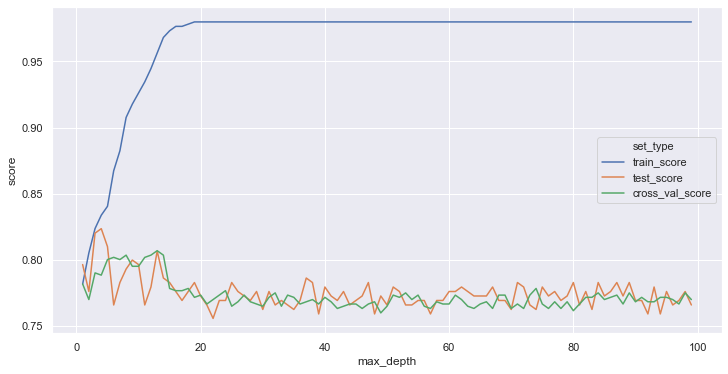

In [29]:
# sns.set_style("whitegrid")
# sns.set(rc={'figure.figsize': (12, 6)})
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [30]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.803725
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.795308


In [59]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(513.825, 570.7800000000001, 'Sex_female <= 0.5\nentropy = 0.975\nsamples = 295\nvalue = [175, 120]'),
 Text(316.20000000000005, 407.70000000000005, 'Fare <= 15.148\nentropy = 0.707\nsamples = 187\nvalue = [151, 36]'),
 Text(158.10000000000002, 244.62, 'Age <= 10.5\nentropy = 0.391\nsamples = 117\nvalue = [108, 9]'),
 Text(79.05000000000001, 81.53999999999996, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(237.15000000000003, 81.53999999999996, 'entropy = 0.362\nsamples = 116\nvalue = [108, 8]'),
 Text(474.30000000000007, 244.62, 'Age <= 54.0\nentropy = 0.962\nsamples = 70\nvalue = [43, 27]'),
 Text(395.25000000000006, 81.53999999999996, 'entropy = 0.988\nsamples = 62\nvalue = [35, 27]'),
 Text(553.3500000000001, 81.53999999999996, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(711.45, 407.70000000000005, 'Pclass <= 1.5\nentropy = 0.764\nsamples = 108\nvalue = [24, 84]'),
 Text(632.4000000000001, 244.62, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(790.500000

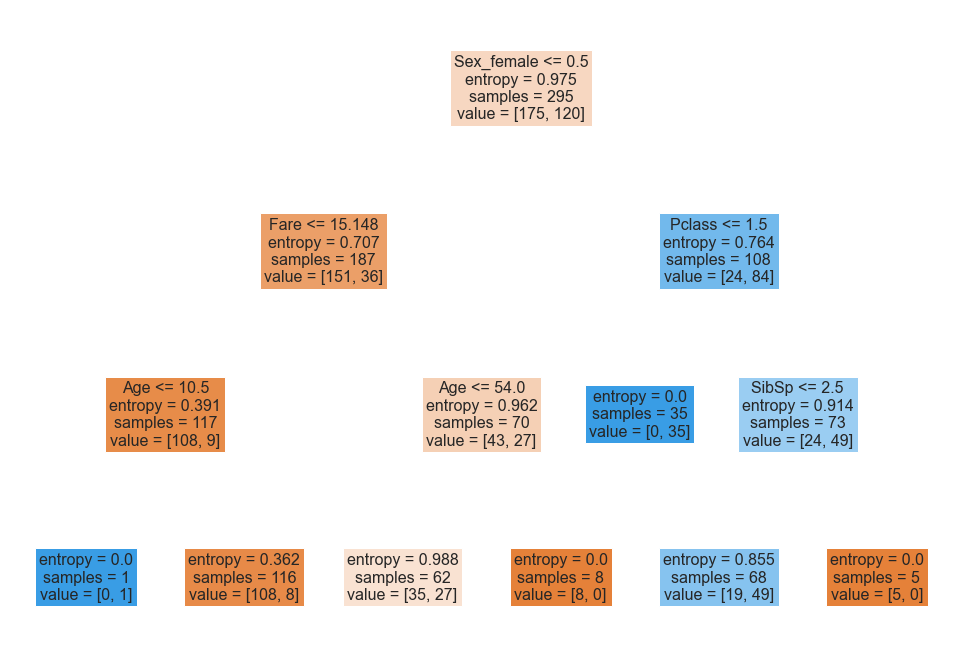

In [60]:
plt.figure(figsize=(17, 12))
tree.plot_tree(clf, fontsize=16, feature_names=list(X), filled=True)
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# tree.plot_tree(clf, feature_names=list(X),
#                class_names=['Negative', 'Positive'],
#                filled=True, max_depth=4,fontsize=5)

In [33]:
best_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10)

In [34]:
best_clf.fit(X_train, y_train) # фиксируем глубину 10, на которой достигается максимальная точность.

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [35]:
best_clf.score(X_test, y_test)

0.8067796610169492

In [36]:
parametrs = {"criterion": ["entropy", "gini"], "max_depth": range(1, 30)}

In [37]:
clf = tree.DecisionTreeClassifier()

In [38]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=20)

In [39]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30)})

In [40]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [41]:
best_clf = grid_search_cv_clf.best_estimator_

In [42]:
best_clf.score(X_test, y_test)

0.8203389830508474

In [43]:
y_pred = best_clf.predict(X_test)

In [44]:
precision_score(y_test, y_pred)

0.8252427184466019

In [45]:
recall_score(y_test, y_pred)

0.7083333333333334

<AxesSubplot:>

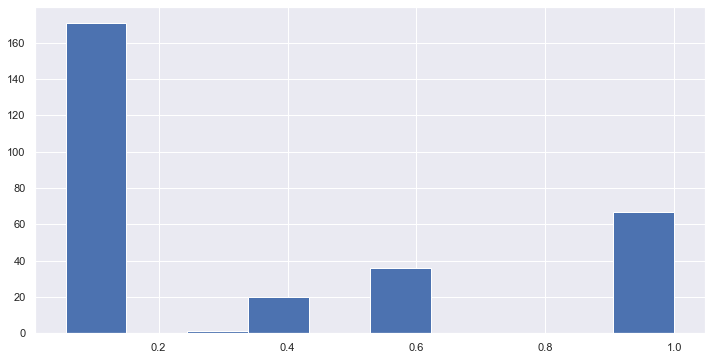

In [46]:
y_pred_prob = best_clf.predict_proba(X_test)
pd.Series(y_pred_prob[:, 1]).hist()

In [47]:
y_pred = np.where(y_pred_prob[:, 1] > 0.8, 1, 0)

In [48]:
precision_score(y_test, y_pred)

0.9104477611940298

In [49]:
recall_score(y_test, y_pred)

0.5083333333333333

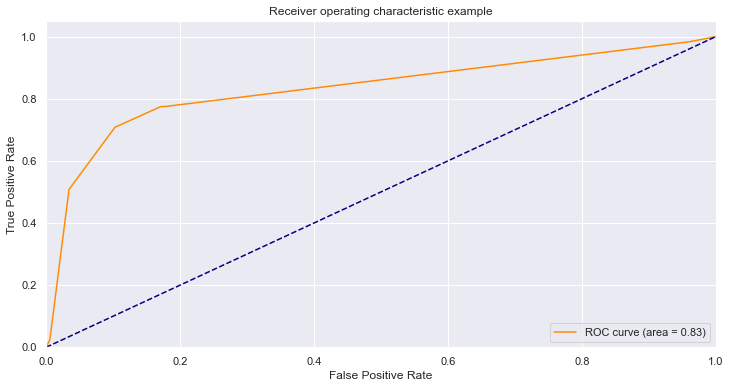

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test, y_pred)

array([[169,   6],
       [ 59,  61]], dtype=int64)

In [69]:
parametrs = {"criterion": ["entropy", "gini"], "max_depth": range(1, 10), # эксперементирую с параметрами.
             "min_samples_split": range(10, 35, 6), "min_samples_leaf": range(1, 11, 2)}

In [82]:
parametrs2 = {"criterion": ["entropy"], "max_depth": range(1, 10),
             "min_samples_split": range(10, 101, 2), "min_samples_leaf": range(1, 50)}

In [99]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=20)

In [100]:
grid_search_cv_clf2 = RandomizedSearchCV(clf, parametrs2, cv=20)

In [101]:
grid_search_cv_clf.fit(X_test, y_test)

GridSearchCV(cv=20,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 11, 2),
                         'min_samples_split': range(10, 35, 6)})

In [103]:
grid_search_cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 22}

In [104]:
best_clf = grid_search_cv_clf.best_estimator_

In [105]:
best_clf.score(X_test, y_test)

0.8711864406779661

In [106]:
y_pred = best_clf.predict(X_test)

In [107]:
precision_score(y_test, y_pred)

0.8416666666666667

In [108]:
recall_score(y_test, y_pred)

0.8416666666666667

In [109]:
y_pred_prob = best_clf.predict_proba(X_test)

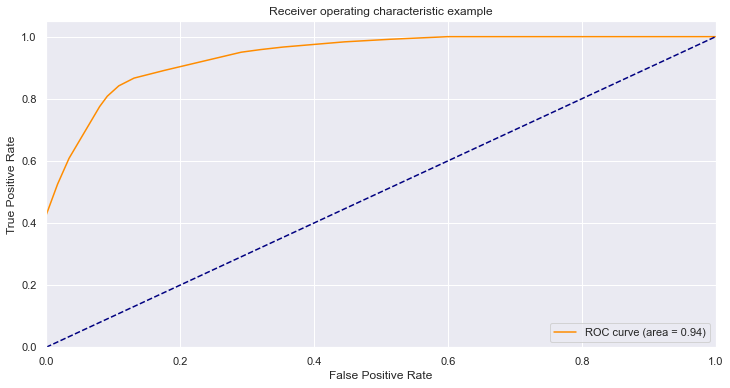

In [110]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [113]:
clf_rf = RandomForestClassifier()              # рандомный лес from 7'th element пошел.

In [114]:
parametrs3 = {"n_estimators": [10, 20, 30], "max_depth": [2, 3 ,5 ,7 ,10]}

In [115]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs3, cv=5)

In [116]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [117]:
grid_search_cv_clf.best_params_

{'max_depth': 3, 'n_estimators': 10}

In [118]:
best_clf = grid_search_cv_clf.best_estimator_

In [119]:
best_clf.score(X_train, y_train)

0.8271812080536913

In [120]:
y_pred = best_clf.predict(X_test)

In [121]:
precision_score(y_test, y_pred)

0.8144329896907216

In [122]:
recall_score(y_test, y_pred)

0.6583333333333333

In [132]:
feature_importances_df = pd.DataFrame({"features": X_train.columns,     # самые важные фичи для деревьев.
                                      "feature_importances": best_clf.feature_importances_}) \
                        .sort_values(by="feature_importances", ascending=False)

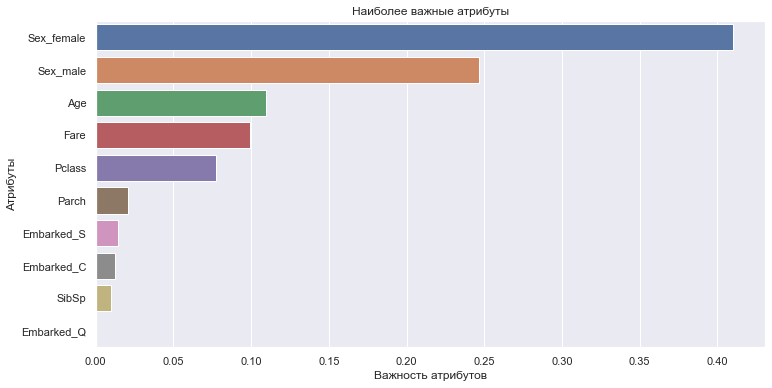

In [135]:
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

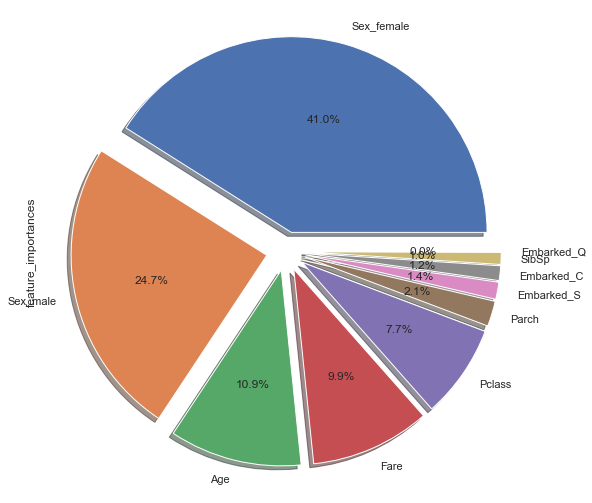

In [144]:
feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(9, 9));

In [146]:
##########################   последний тест из 3.2      ##############################################

In [150]:
test_data = pd.read_csv("D:\\python\\jupyter\\files\\heart.csv")

In [151]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [156]:
y = test_data.target
X = test_data.drop("target", axis=1)

In [157]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [158]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [159]:
feature_importances_heart = pd.DataFrame({"features": X.columns,
                                         "feature_importances": rf.feature_importances_}) \
                        .sort_values(by="feature_importances", ascending=False)

<AxesSubplot:xlabel='feature_importances', ylabel='features'>

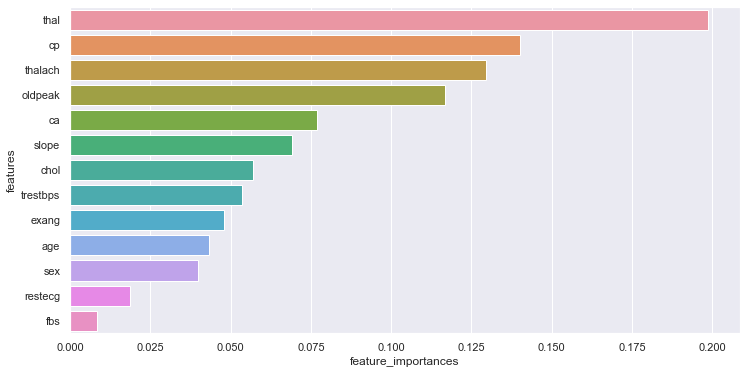

In [166]:
sns.barplot(x="feature_importances", y="features", data=feature_importances_heart,
            label="importance")   # , color="b" (цвет как стандарт из пандаса)

In [171]:
######################################## the end #####################################################
####################################### some useful stuff ############################################

<AxesSubplot:>

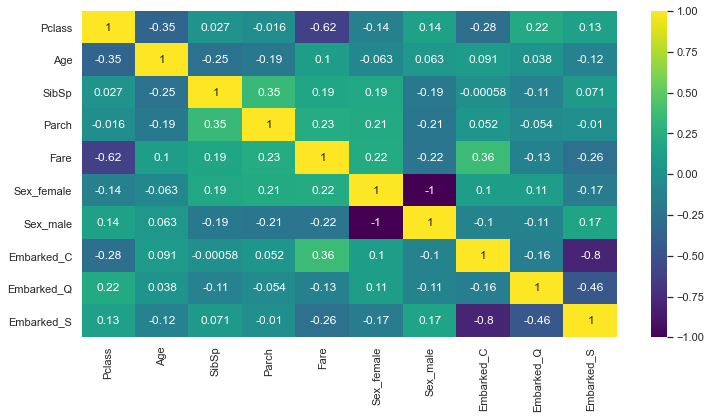

In [172]:
sns.heatmap(X_test.corr(),cmap='viridis',annot=True)

In [173]:
###             SNS plots
### distplot 1 per (option nesk. v odnom)
### lmplot 2 per like scatter (option + reg)
### heatmap 2 per
### barplot sverhy
### lineplot 2 per
### violinplot 2 per
### pairlplot korr (+reg) between all